**Deep Learning Model Hyperparameters for Classification**

This table outlines the typical hyperparameters and settings used when building neural networks for **Binary** and **Multiclass** classification tasks, particularly within frameworks like PyTorch.

| Hyperparameter | Binary Classification | Multiclass Classification |
| :--- | :--- | :--- |
| **Input Layer Shape** (`in_features`) | Same as the number of features (e.g., 5 for age, sex, height, etc.) | Same as Binary Classification |
| **Hidden Layer(s)** | Problem specific; minimum = 1, maximum = unlimited | Same as Binary Classification |
| **Neurons per Hidden Layer** | Problem specific; generally 10 to 512 | Same as Binary Classification |
| **Output Layer Shape** (`out_features`) | **1** (single logit representing one of two classes) | **1 per class** (e.g., 3 for food, person, or dog photo) |
| **Hidden Layer Activation** | Usually **ReLU** (Rectified Linear Unit), but others can be used | Same as Binary Classification |
| **Output Activation** | **Sigmoid** (`torch.sigmoid`) | **Softmax** (`torch.softmax`) |
| **Loss Function** | **Binary Cross-Entropy** (`torch.nn.BCELoss`) | **Cross-Entropy** (`torch.nn.CrossEntropyLoss`) |
| **Optimizer** | **SGD** (Stochastic Gradient Descent), **Adam**, or others (`torch.optim`) | Same as Binary Classification |

**Make classification data and get it ready**

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.05,random_state=42)
print(X)
# print(y)

[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 ...
 [-0.12823057 -0.82613318]
 [ 0.66090453 -0.79319015]
 [ 0.27841491  0.96735953]]


In [3]:
# making it into a dataframe
import pandas as pd
circle_df=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],'label':y})
circle_df.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


This is a **binary classification** problem, since there are only 2 options, 1,0

In [4]:
# how many value each class (0/1) has
circle_df.label.value_counts()
# label 1: 500 values
# label 0: 500 values

label
1    500
0    500
Name: count, dtype: int64

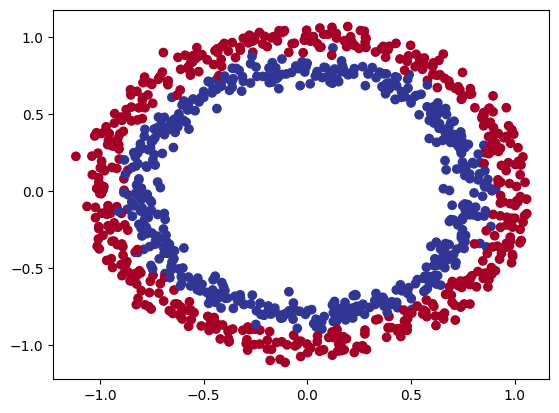

In [5]:
# plotting these values
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()
# problem: we need to classify dots into red(0), blue(1)

In [6]:
# shape of X and y
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

(1000, 2)
(1000,)
[0.74220688 0.24668576]
1


In [7]:
# for training, testing, making X,y into tensor
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [8]:
print(X.shape)
print(y.shape)


torch.Size([1000, 2])
torch.Size([1000])


In [9]:
# splitting data into training, testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, 
                                                  test_size=0.2 # 80% training, 20% testing
                                                  )

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


**Building a model**

steps for building a model
1. setting up device
2. constructing a model using by subclass `nn.Module`
3. defining `loss function` and `optimizer`
4. traing, testing loops

In [10]:
# setting up device
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


now we want to make a model that take input (features, X) and predicts output (label, y)

In [11]:
# constructing a model class from `nn.Module`
from torch import nn
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # creating a 2 nn.Linear layers capable for handeling X and y input output shapes
        # X shape [1000,2]
        # y shape [1000]
        self.layer_1=nn.Linear(in_features=2, out_features=5) # Layer1: input: 2, output: 5
        self.layer_2=nn.Linear(in_features=5, out_features=1) # Layer2: input: 5, output: 1
        # so, there are 5 hidden layer
    
    # forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # first at Layer1, then Layer2
    
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
# making untrained predictions
untrained_preds=model_0(X_test.to(device))
print(untrained_preds[:10])
print(y_test[:10])

tensor([[-0.4215],
        [-0.2026],
        [-0.6367],
        [-0.3503],
        [-0.1505],
        [-0.0155],
        [ 0.1676],
        [ 0.2138],
        [-0.6629],
        [-0.2067]], grad_fn=<SliceBackward0>)
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


**loss function and optimizer**


| Loss Function / Optimizer | Problem Type | PyTorch Code |
| :--- | :--- | :--- |
| **Stochastic Gradient Descent (SGD) Optimizer** | Classification, Regression, many others | `torch.optim.SGD()` |
| **Adam Optimizer** | Classification, Regression, many others | `torch.optim.Adam()` |
| **Binary Cross Entropy Loss** | **Binary Classification** | `torch.nn.BCEWithLogitsLoss` or `torch.nn.BCELoss` |
| **Cross Entropy Loss** | **Multi-class Classification** | `torch.nn.CrossEntropyLoss` |
| **Mean Absolute Error (MAE) or L1 Loss** | **Regression** | `torch.nn.L1Loss` |
| **Mean Squared Error (MSE) or L2 Loss** | **Regression** | `torch.nn.MSELoss` |

In [13]:
# parameters of model
print(model_0.parameters())

<generator object Module.parameters at 0x000001D93FAE7220>


In [14]:
# loss function
loss_fn=nn.BCEWithLogitsLoss() # BCEWithLogistsLoss(): has built in sigmoid function
# optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [15]:
# evaluation metric
# this calculates how right our model is

def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true,y_pred).sum().item() # torch.eq(): calculates where two tensors are equal
    acc=(correct/len(y_pred))*100
    return acc


**Pre-Training evaluation**

In [16]:
# before training model
# let's pass some of the value in forward pass
y_logits=model_0(X_test.to(device))[:5]
print(y_logits)

tensor([[-0.4215],
        [-0.2026],
        [-0.6367],
        [-0.3503],
        [-0.1505]], grad_fn=<SliceBackward0>)


In [17]:
# passing this through sigmoid activation function
y_pred_probs=torch.sigmoid(y_logits)
print(y_pred_probs)

# output of `y_pred_probs` much more stable that `y_logits` after passing through `sigmoid activation function`

tensor([[0.3961],
        [0.4495],
        [0.3460],
        [0.4133],
        [0.4625]], grad_fn=<SigmoidBackward0>)


In [18]:
# prediction probablities
y_preds=torch.round(y_pred_probs).squeeze()
print(y_preds)

tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)


In [19]:
print(y_test[:5])

# so, we sucessfully convert, models raw output (y_logists) to prediction probablities (y_pred_probablities)
# then we round it using `torch.round()`

tensor([1., 0., 1., 0., 1.])


**Buinding a Training, Testing loop**

In [20]:
torch.manual_seed(seed=42)
epochs=100

epoch_count=[]
train_loss_values=[]
test_loss_values=[]
accuracy_values=[]

# putting data on target device
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)


for epoch in range(epochs):
    
    # Training Loop
    model_0.train() # setting up

    # forward pass
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    # loss function,accuracy
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss(): works with raw logits
                 y_train) # calculating loss between `predicted` and `actual` value
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    # zero grad optimizer
    optimizer.zero_grad()

    # backpropagation of loss
    loss.backward()

    # updation
    optimizer.step()

    # Testing Loop
    model_0.eval()
    with torch.inference_mode():
        
        # forward pass
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        # loss/accuracy
        test_loss=loss_fn(test_logits,y_test) # calculating loss between `predicted` and `actual` value
        test_acc=accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
        
    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        accuracy_values.append(acc)
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    
    

    

Epoch: 0 | Loss: 0.71407, Accuracy: 47.12% | Test loss: 0.71923, Test acc: 44.00%
Epoch: 10 | Loss: 0.70401, Accuracy: 48.88% | Test loss: 0.70817, Test acc: 46.50%
Epoch: 20 | Loss: 0.69942, Accuracy: 48.75% | Test loss: 0.70263, Test acc: 48.50%
Epoch: 30 | Loss: 0.69714, Accuracy: 49.62% | Test loss: 0.69961, Test acc: 49.00%
Epoch: 40 | Loss: 0.69589, Accuracy: 49.75% | Test loss: 0.69783, Test acc: 49.50%
Epoch: 50 | Loss: 0.69514, Accuracy: 49.38% | Test loss: 0.69670, Test acc: 49.50%
Epoch: 60 | Loss: 0.69465, Accuracy: 49.00% | Test loss: 0.69595, Test acc: 50.00%
Epoch: 70 | Loss: 0.69431, Accuracy: 49.25% | Test loss: 0.69542, Test acc: 49.50%
Epoch: 80 | Loss: 0.69405, Accuracy: 49.25% | Test loss: 0.69505, Test acc: 50.00%
Epoch: 90 | Loss: 0.69386, Accuracy: 49.50% | Test loss: 0.69478, Test acc: 50.00%


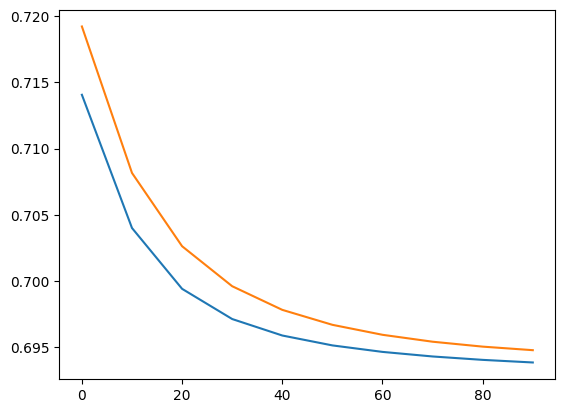

In [21]:
# plotting graph of loss functions
import matplotlib.pyplot as plt

plt.plot(epoch_count,train_loss_values)
plt.plot(epoch_count,test_loss_values)
plt.show()

In [22]:
# downloading `helper_function.py` from PyTorch Repo
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get(
      "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


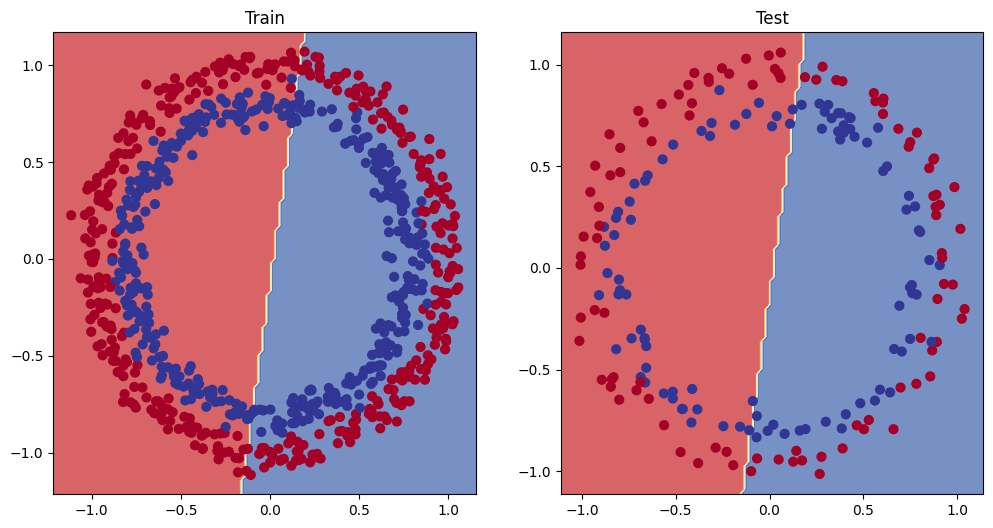

In [24]:
from helper_functions import plot_decision_boundary
# making plot_decision_boundary for training, testing set

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)


It clearly shows that, model is not working properly, 
we've define a classification task, classify between `red` and `blue` dots, 
but it's tying to fit a `straight line`, which is `underfitting`.

**Improving a model (from model's prespective)**

There are some steps that we can follow to improve model's performance
1. Add more layers: adding more `hidden layers` can improve efficiency
2. Fitting for longer: by increasing `epochs`, we can improve efficiency
3. Changing Activation Function
4. Changing Learning Rate
5. Changing Loss Function
6. Using Transfer Learning